C:\Users\49157\AppData\Local\Temp\ipykernel_46620\450841141.py:9: RuntimeWarning: invalid value encountered in log
  right_side = (X_0 + Y_xs * (S_0 + K_s)) * np.log(X/X_0) - K_s * Y_xs * np.log(1 - (( X - X_0 )/(S_0 * Y_xs)))
C:\Users\49157\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Model cellmass concentrations over time: [0.05, 0.08371895531771581, 0.14003496237628227, 0.23383322958428399, 0.3893329220897496, 0.5147935524305487, 0.5275468340236054, 0.5688471748895546, 0.5443124572888599, 0.6405428547342742]
R-squared: 0.8275
RMSE: 0.0789


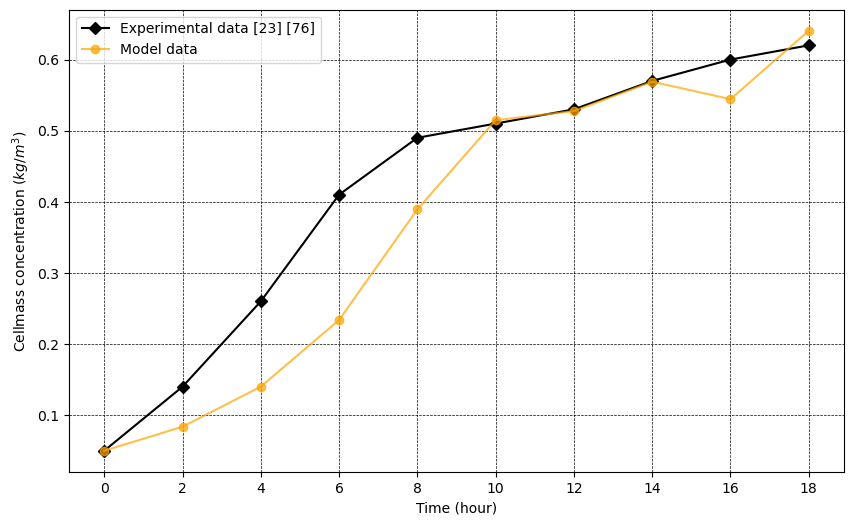

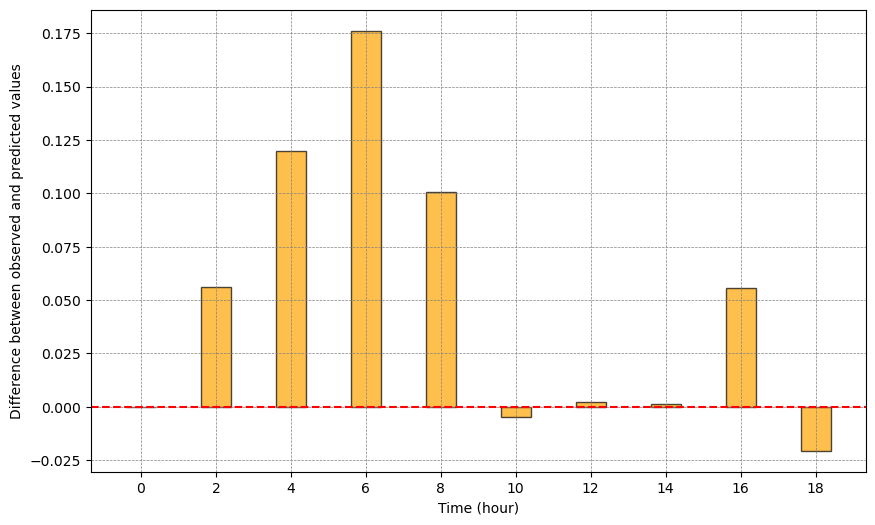

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Cellmass concentration as a function of t
def Classical_monod(X, mu_max, X_0, Y_xs, S_0, K_s, t):
    left_side = mu_max * (X_0 + Y_xs * S_0) * t
    right_side = (X_0 + Y_xs * (S_0 + K_s)) * np.log(X/X_0) - K_s * Y_xs * np.log(1 - (( X - X_0 )/(S_0 * Y_xs)))
    return left_side - right_side

# Parameter values
mu_max = 0.40       # Maximum growth rate (per hour)
X_0 = 0.05          # Initial cellmass concentration 
Yield = np.array([0.8,0.8,0.8, 0.8 ,0.8, 0.079, 0.052, 0.053, 0.063, 0.069]) # Yield coefficient (cellmass  per substrate)
S_0 = 10.0          # Initial substrate concentration
K_s = 5.51          # Saturation constant
Time = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])  # Time points
Cellmass_concentration = np.array([0.05, 0.14, 0.26, 0.41, 0.49, 0.51, 0.53, 0.57, 0.60, 0.62])  # Experimental values

# Initial guess for S
initial_guess = 0.05
  
# Solving the equation for Cellmass concentration at each time step
C_solutions = []

for t,Y_xs in zip(Time,Yield):
    C_solution = fsolve(Classical_monod, initial_guess, args=(mu_max, X_0, Y_xs, S_0, K_s, t))
    C_solutions.append(C_solution[0])


# Print model predictions
print("Model cellmass concentrations over time:", C_solutions)

# Calculate residuals
residuals = Cellmass_concentration - C_solutions

# Perform regression analysis
r2 = r2_score(Cellmass_concentration, C_solutions)
rmse = np.sqrt(mean_squared_error(Cellmass_concentration, C_solutions))

# Print regression metrics
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot experimental vs. model data
plt.figure(figsize=(10, 6))
plt.plot(Time, Cellmass_concentration, label='Experimental data [23] [76]', color = 'black', marker='D', alpha=1)
plt.plot(Time, C_solutions, label='Model data', color = 'orange', marker='o', alpha=0.7)
plt.xlabel('Time (hour)')
plt.xticks(Time)
plt.ylabel('Cellmass concentration ($kg/m^3$)')
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.bar(Time, residuals, color='orange', edgecolor='black', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Time (hour)')
plt.ylabel('Difference between observed and predicted values')
plt.xticks(Time)
plt.grid(color='gray', linestyle='--', linewidth=0.5) 
plt.show()